In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\rohit\AppData\Local\Temp\ipykernel_14848\276062395.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('netflix_dataset.csv')

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7789, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [7]:
(df.isna().sum()/df.shape[0])*100

Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64

Insight: Director has 30.65% null values , Cast has 9% null values , Country has 6.5% null values, Release Date and Rating both combined have < 1% null values

***
### Questions and Tasks
***
Task. 1 Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records. [X]</br>
Task. 2 Is there any Null Value present in any column ? Show with Heat-map. [X]
***
1. For 'House of Cards', what is the Show Id and Who is the Director of this show ? [X]
2. In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph. [X]
3. How many Movies & TV Shows are in the dataset ? Show with Bar Graph. [X]
4. Show all the Movies that were released in year 2000. [X]
5. Show only the Titles of all TV Shows that were released in India only. [X]
6. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ? [X]
7. Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom". [X]
8. In how many movies/shows, Tom Cruise was cast ? [X]
9. What are the different Ratings defined by Netflix ? [X]
 - How many Movies got the 'TV-14' rating, in Canada ? [X]
 - How many TV Shows got the 'R' rating, after year 2018 ? [X]
10. What is the maximum duration of a Movie/Show on Netflix ? [X]
11. Which individual country has the Highest No. of TV Shows ? [X]
12. How can we sort the dataset by Year ? [X]
13. Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'. [X]
14. Find the avg running time of movies and tv shows on netflix? [X]
15. Find top 5 Countries who are highest consumers of movies, tv shows and both. [X]
***

Task -1

In [8]:
df.duplicated().sum()

2

In [9]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

Task -2

<Axes: >

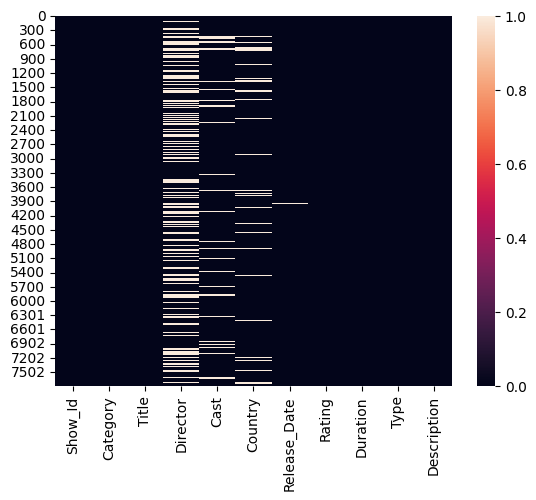

In [12]:
sns.heatmap(df.isna())

Qn 1

In [13]:
df[df['Title']=='House of Cards'][['Show_Id','Director']].values

array([['s2833',
        'Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson']],
      dtype=object)

Qn 2 

In [14]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip(), format='%B %d, %Y')
df['Release_year'] = df['Release_Date'].dt.year

In [16]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0


In [17]:
df.Release_year.value_counts()

Release_year
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Release_year'>

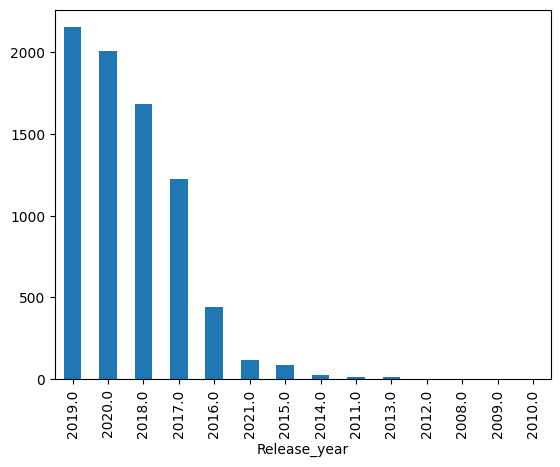

In [18]:
df.Release_year.value_counts().plot.bar()

qn 3

In [19]:
df[df['Category'] == 'Movie'].Category.count()

5377

In [20]:
df[df['Category'] == 'TV Show'].Category.count()

2410

<Axes: xlabel='Category', ylabel='count'>

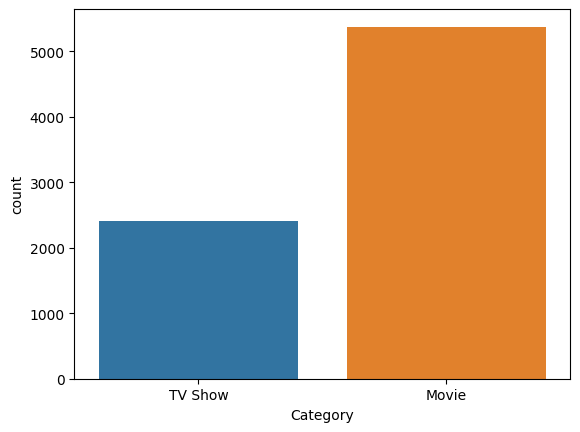

In [21]:
sns.countplot(data = df,x = 'Category')

qn 4

In [22]:
df[(df.Category == 'Movie') & (df.Release_year == 2000.0)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year


qn 5

In [23]:
df[(df.Category == 'TV Show') & (df['Country'] == 'India')].Title.values

array(['21 Sarfarosh: Saragarhi 1897', '7 (Seven)', 'Agent Raghav',
       'Akbar\xa0Birbal', 'Anjaan: Rural Myths',
       'Anjaan: Special Crimes Unit', 'Bad Boy Billionaires: India',
       'Badalte Rishton Ki Dastaan', 'Bard of Blood', 'Betaal',
       'Bh Se Bhade', 'Bhaag Beanie Bhaag', 'Bhaage Re Mann',
       'Chhota Bheem', 'ChuChu TV Nursery Rhymes & Kids Songs (Hindi)',
       'Classic Legends', 'College Romance',
       'Cricket Fever: Mumbai Indians', 'Darr Sabko Lagta Hai',
       'Delhi Crime', 'Devlok with Devdutt Pattanaik', 'Dharmakshetra',
       'Engineering Girls', 'Fabulous Lives of Bollywood Wives',
       'Fear Files... Har Mod Pe Darr', 'Gabru: Hip Hop Revolution',
       'Gangs of Hassepur', 'GHOUL', 'Girls Hostel', 'Hasmukh', 'Inmates',
       'Jamtara - Sabka Number Ayega', 'Jhansi Ki Rani',
       'Khan: No. 1 Crime Hunter', 'Khelti Hai Zindagi Aankh Micholi',
       'Khotey Sikkey', 'Ladies Up', 'Leila', 'Little Singham',
       'Little Things', 'Maharaksh

Qn 6

In [24]:
df.Director.value_counts().nlargest(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

qn 7

In [25]:
df['Type'] = df['Type'].astype(str)

In [26]:
df[((df['Category'] == 'Movie') & (df['Type'].str.contains('Comedies'))) | (df['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,2019-05-21,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019.0
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


qn 8

In [27]:
df['Cast'] = df['Cast'].astype(str)
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


qn 9

In [28]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

qn 9.1

In [29]:
df[(df.Category == 'Movies') & (df.Rating == 'TV-14') & (df.Country == 'Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year


qn 9.2

In [30]:
df[(df.Category == 'TV Show') & (df.Rating == 'R') & (df.Release_year > 2018.0)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0


qn 10

In [31]:
df['Minutes'] = df[(df.Category == 'Movie')].Duration.str.split(' ').apply(lambda x: x[0]).astype(float)

In [32]:
df['Seasons'] = df[(df.Category == 'TV Show')].Duration.str.split(' ').apply(lambda x: x[0]).astype(float)

In [33]:
print(f"Max duration of Movie on Netflix: {df.Minutes.max()} minutes")
print(f"Max duration of TV Show on Netflix: {df.Seasons.max()} seasons")

Max duration of Movie on Netflix: 312.0 minutes
Max duration of TV Show on Netflix: 16.0 seasons


qn 11

In [34]:
df[(df.Category == 'TV Show')].Country.value_counts().nlargest(1)

Country
United States    705
Name: count, dtype: int64

qn 12

In [35]:
df.sort_values(by='Release_year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year,Minutes,Seasons
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81.0,NaN
1765,s1766,TV Show,Dinner for Five,NaN,nan,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,NaN,1.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104.0,NaN
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29.0,NaN
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN,2.0
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN,3.0
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,4.0
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN,13.0


qn 13

In [36]:
df[((df.Category == 'Movie') & (df.Type.str.contains('Dramas'))) | ((df.Category == 'TV Show') & (df.Type.str.contains("Kid's TV")))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_year,Minutes,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0,NaN
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0,119.0,NaN
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017.0,103.0,NaN
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019.0,149.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,158.0,NaN
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018.0,104.0,NaN
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018.0,94.0,NaN
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,99.0,NaN


qn 14

In [37]:
print(f"Average duration of Movie on Netflix: {df.Minutes.mean()} minutes")
print(f"Average duration of TV Show on Netflix: {df.Seasons.mean().round(0)} seasons")

Average duration of Movie on Netflix: 99.30797842663195 minutes
Average duration of TV Show on Netflix: 2.0 seasons


qn 15

In [38]:
df[df.Category=='Movie'].Country.value_counts().nlargest(5)

Country
United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Name: count, dtype: int64

<Axes: xlabel='Country'>

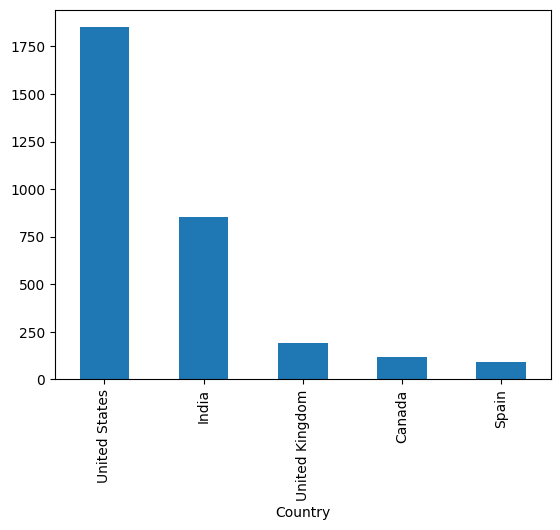

In [41]:
df[df.Category=='Movie'].Country.value_counts().nlargest(5).plot.bar()

In [39]:
df[df.Category=='TV Show'].Country.value_counts().nlargest(5)

Country
United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: count, dtype: int64

<Axes: xlabel='Country'>

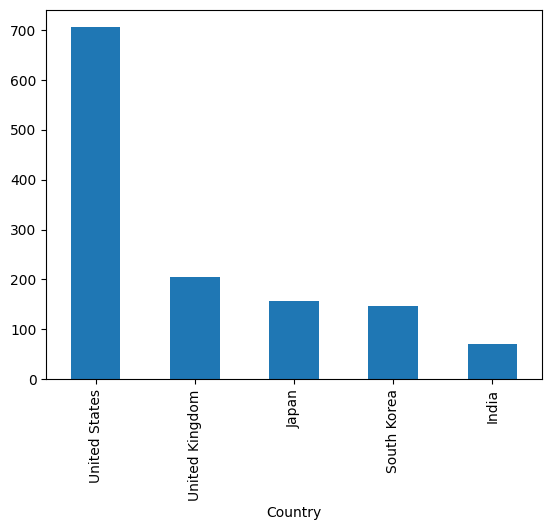

In [43]:
df[df.Category=='TV Show'].Country.value_counts().nlargest(5).plot.bar()

In [40]:
df.Country.value_counts().nlargest(5)

Country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: count, dtype: int64

<Axes: xlabel='Country'>

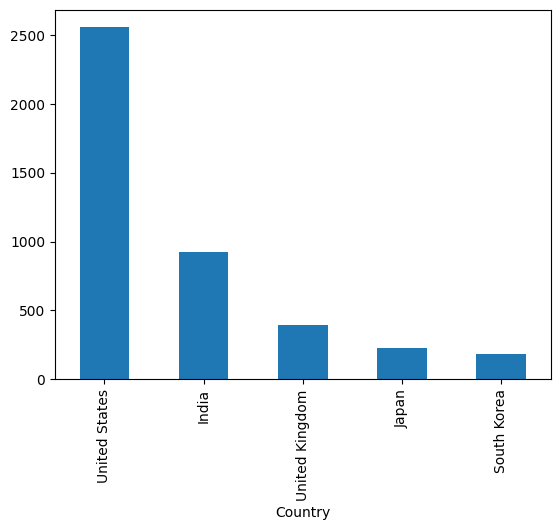

In [42]:
df.Country.value_counts().nlargest(5).plot.bar()